## Información no Estructurada
# Práctica 3.1 &mdash; Búsqueda Web y Recomendación - PageRank
### Autores: Íñigo Gómez Carvajal y Jon Zorrilla Gamboa 

# 0.  Ejercicios

## Ejemplo diapositivas

Matriz de adyacencia normalizada (M)

In [ ]:
#pip install numpy

In [ ]:
import numpy as np

M = np.array([[0, 1/2, 1/2, 0, 0, 0],
              [0, 0, 0, 0, 0, 0],
              [1/3, 1/3, 0, 0, 1/3, 0],
              [0, 0, 0, 0, 1/2, 1/2],
              [0, 0, 0, 1/2, 0, 1/2],
              [0, 0, 0, 1, 0, 0]])

Pintamos el grafo correspondiente

In [ ]:
#pip install matplotlib

In [ ]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


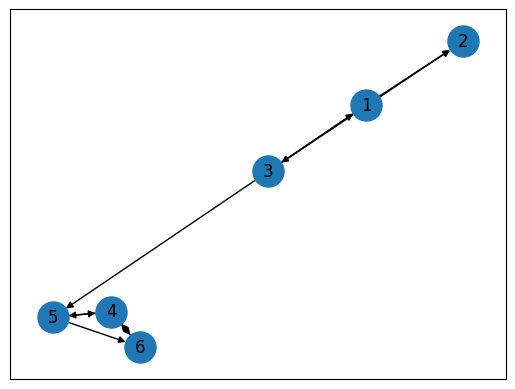

In [ ]:
%matplotlib inline

import math
import matplotlib.pyplot as plt
import networkx as nx

def plot_graph(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix != 0)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.DiGraph()
    gr.add_edges_from(edges)
    nx.spring_layout(gr, k=5/math.sqrt(gr.order()))
    nx.draw_networkx(gr, node_size=500, labels=mylabels, with_labels=True)
    # nx.draw_networkx(gr, node_size=500)
    plt.show()

plot_graph(M, {i:str(i+1) for i in range(0,6)})

### Cálculo de PageRank iterativo

Empezamos con $r_1(P_6)$

In [ ]:
n = 6
r0_p4 = r0_p5 = 1 / n
p4 = 2
p5 = 2
r1_p6 = r0_p4 / p4 + r0_p5 / p5
print(r1_p6)

0.16666666666666666


Ahora vemos $r_2(P_4)$ (**completar lo que falta**)

In [ ]:
p5 = 2
p6 = 1
r0_p3 = 1 / n
p3 = 3
r1_p5 = r0_p4 / p4 + r0_p3 / p3
r2_p4 = r1_p5/p5 + r1_p6 / p6
print(r2_p4)
#17/72

0.2361111111111111


### Cálculo de PageRank usando representación matricial

Volvemos a calcular $r_1(P_6)$ y $r_2(P_4)$ (**completar lo que falta**)

In [ ]:
pi0 = np.ones(n)*1/6
pi1 = pi0 @ M
print(pi1[5]) # r1_p6

pi2 = pi1 @ M
print(pi2[3]) # r2_p4

0.16666666666666666
0.2361111111111111


## Repite los ejemplos de sumideros y ciclos e incluye algún otro que se te ocurra

En primer lugar, veremos lo que ocurre para un ejemplo de sumideros:

In [ ]:
# TODO
pi = pi0
for i in range(13):
    pi = pi @ M
print(pi)

[1.19074836e-06 2.97687090e-06 1.78612254e-06 2.66684868e-01
 1.33314893e-01 1.99999286e-01]


En este caso, hemos repetido el modelo visto en clase, donde se ha visto que a partir de 13 iteraciones el vector $\pi = (0,0,0,2/3,1/3,1/5)$ se mantiene invariante, por lo que podemos observar un sumidero asociado a los nodos 4,5 y 6.

Ahora, haremos un ejemplo de ciclos.

In [ ]:
pi1 = np.array([1, 0, 1, 0, 0, 0])
M1 = np.array([[0, 1, 0, 0, 0, 0],
              [1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 1/2, 1/2],
              [0, 0, 0, 1/2, 0, 1/2],
              [0, 0, 0, 1, 0, 0]])
for i in range(10):
  pi1 = pi1 @ M1
  print(pi1)

[0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]


Como podemos observar, para este nuevo caso, hemos creado un ciclo entre los nodos 1 y 2, por lo que independientemente del número de iteraciones, los scores se van a mantener únicamente en esos dos nodos.

## Estocasticidad y primitividad

In [ ]:
S = M 
S[1] = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
r = 0.85
N = 6
e = np.atleast_2d(np.ones(N))/N
G = r*S + (1 - r)*e 
print(G)

[[0.025      0.45       0.45       0.025      0.025      0.025     ]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.30833333 0.30833333 0.025      0.025      0.30833333 0.025     ]
 [0.025      0.025      0.025      0.025      0.45       0.45      ]
 [0.025      0.025      0.025      0.45       0.025      0.45      ]
 [0.025      0.025      0.025      0.875      0.025      0.025     ]]


# 1.  Práctica

## 1.1 Calcular PageRank en el subgrafo web formado por las páginas accesibles desde (e incluyendo) [esta dirección](http://arantxa.ii.uam.es/~abellogin/ir/C.html). 

Tomar r = 0.1, N = nº de páginas en el subgrafo, y 0.3 como valor inicial de PageRank para empezar a iterar. 

Nota: para grafos con pocos nodos, es también viable resolver la fórmula de PageRank como un sistema de ecuaciones, en lugar de iterar. 

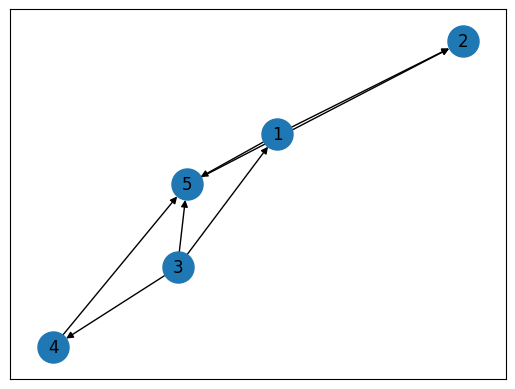

In [ ]:
%matplotlib inline

import math
import matplotlib.pyplot as plt
import networkx as nx

def plot_graph(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix != 0)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.DiGraph()
    gr.add_edges_from(edges)
    nx.spring_layout(gr, k=5/math.sqrt(gr.order()))
    nx.draw_networkx(gr, node_size=500, labels=mylabels, with_labels=True)
    # nx.draw_networkx(gr, node_size=500)
    plt.show()

plot_graph(M, {i:str(i+1) for i in range(0,5)})

Definiremos una función auxiliar para realizar el cálculo de pagerank mediante producto de vectores y matrices.

In [ ]:
def iterate_pagerank(M, r, pi0, pref = None, niter=100, prec=1e-3):

  n = M.shape[0]

  S = M.copy()
  S[S.sum(axis=1) == 0] = n*[1./n] 

  if pref is None:
    e = np.atleast_2d(np.ones(n))/n
  else:
    e = np.ones(n).reshape(-1, 1)@pref.reshape(1, -1)

  G = r*S + (1 - r)*e

  pi_old = pi0

  for i in range(niter):
    pi_pagerank = pi_old.T @ G
    if np.linalg.norm(pi_old - pi_pagerank, ord=1) < prec:
      break
    
    pi_old = pi_pagerank
  
  return pi_pagerank


In [ ]:
M = np.array([[0, 1/2, 0, 0, 1/2],
              [0, 0, 0, 0, 0],
              [1/3, 0, 0, 1/3, 1/3],
              [0, 0, 0, 0, 1/2],
              [0, 1, 0, 0, 0],])

r = 0.1
pi0 = np.full(5, 0.3)

In [ ]:
iterate_pagerank(M=M, r=r, pi0=pi0)

array([0.10972668, 0.12389141, 0.10615384, 0.10972668, 0.12080593])

Como podemos observar obtenemos estos 5 valores para cada una de las 5 páginas. Pero, como podemos ver, estos números no suman uno, por lo que si queremos interpretar esta distribución como una distribución de probabilidades, es interesante normalizar el vector de tal manera que la suma de las probabilidades sea 1.

In [ ]:
iterate_pagerank(M=M, r=r, pi0=pi0)/iterate_pagerank(M=M, r=r, pi0=pi0).sum()

array([0.19240015, 0.21723728, 0.18613537, 0.19240015, 0.21182705])

Ahora, podemos ver que las probabilidades suman 1. Esto nos indica que el algoritmo pagerank para los datos de entrada que hemos seleccionado nos devuelve estas probabilidades para cada una las páginas A, B, C, D y E. Esto sería interpretado como el tiempo que un surfista aleatorio pasaría en cada una de las 5 páginas.

## 1.2 Cálculo de PageRank personalizado

Con los mismos parámetros del apartado anterior, personalizar PageRank para un usuario que tiene sólo las páginas 'A.html' y 'D.html' entre sus preferencias.

Para tener en cuenta que el usario solo tiene dos páginas entre sus preferencias, debemos usar la propuesta original de Brin & Page, a pesar de los problemas que puede causar, como los sumideros o los ciclos. Para ello, debemos definir el vector inicial $v = (1/2, 0, 0, 1/2, 0, 0)$. 

In [ ]:
v = np.array([1/2, 0, 0, 1/2, 0])

def iterate_pagerank_personalizado(M, r, pi0, v, pref = None, niter=100, prec=1e-3):

  n = M.shape[0]

  S = M.copy()
  S[S.sum(axis=1) == 0] = n*[1./n] 

  if pref is None:
    e = np.atleast_2d(np.ones(n))/n
  else:
    e = np.ones(n).reshape(-1, 1)@pref.reshape(1, -1)

  G = r*S + (1 - r)*e*v

  pi_old = pi0

  for i in range(niter):
    pi_pagerank = pi_old.T @ G
    if np.linalg.norm(pi_old - pi_pagerank, ord=1) < prec:
      break
    
    pi_old = pi_pagerank
  
  return pi_pagerank


In [ ]:
pref = np.array([1/2, 0, 0, 1/2, 0])
iterate_pagerank(M, r, pi0, pref)

array([6.79814821e-02, 4.28869590e-03, 8.77987274e-05, 6.79814821e-02,
       7.04942213e-03])

De nuevo, normalizamos el resultado para poder interpretar las probabilidades.

In [ ]:
iterate_pagerank(M, r, pi0, pref)/iterate_pagerank(M, r, pi0, pref).sum()

array([0.46123888, 0.02909783, 0.00059569, 0.46123888, 0.04782872])

Tomamos como criterio de parada el decimal 0.001 por ejemplo entre vectores.

En este caso, se puede observar que la preferencia del usuario ha tenido una gran influencia en el resultado final, ya que las probabilidades para las páginas web A y D son muy superiores a las probabilidades de las otras webs.

## Opcional A

Probar valores distintos de r para calcular PageRank.

Probaremos distintos valores de r para calcular su influencia en el algoritmo pagerank.

In [ ]:
r_ex = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
for r in r_ex:
  print(iterate_pagerank(M, r, pi0, pref)/iterate_pagerank(M, r, pi0, pref).sum())

[0.5 0.  0.  0.5 0. ]
[0.42048629 0.06557218 0.00273802 0.42048629 0.09071722]
[0.33674361 0.15381482 0.01319377 0.33674361 0.1595042 ]
[0.25609846 0.24947389 0.03242832 0.25609846 0.20590087]
[0.18354859 0.34007972 0.05872426 0.18354859 0.23409884]
[0.12091945 0.41928728 0.08925371 0.12091945 0.24962011]


Como se puede ver, se ha emulado el ejemplo anterior para las distintas propuestas del valor r para el algoritmo pagerank, y también se ha normalizado el resultado para estudiarlo con mayor facilidad. Como se puede observar, para los valores más pequeños de r, las distribuciones de probabilidades finales dan mucho más peso a las preferencias del ususario, mientras que para valores más grandes de r, las preferencias del usuario pierden fuerza en el resultado. Esto es lógico, ya que para valores pequeños de r, para la matriz G, la matriz e (que es la que tiene en cuenta la preferencia del usuario) tiene más peso que la matriz S, la cual depende únicamente de la matriz de transición.